## 6.2 조건부 확률

In [4]:
#조건부 확률 결과 검증
import enum, random

In [6]:
#Enum을 사용하면 각 항목에 특정 값을 부여할 수 있으며 파이썬 코드를 더욱 깔끔하게 만들어 준다.
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

def random_kid()->Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl+=1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls +=1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl+=1

print("P(both|older):",both_girls/older_girl)#1/2
print("P(both|either):",both_girls/either_girl)#1/3

P(both|older): 0.5007089325501317
P(both|either): 0.3311897106109325


## 6.3 베이즈 정리

In [2]:
99/(99+10000-1)

0.00980392156862745

## 6.4 확률변수

In [3]:
import numpy as np
0.1*(np.sum([i for i in range(10)]))

4.5

## 6.5 연속분포

#### 균등분포의 확률 밀도 함수

In [7]:
def uniform_pdf(x:float)->float:
    return 1 if 0<=x<1 else 0

In [8]:
uniform_pdf(10)

0

In [9]:
uniform_pdf(0.5)

1

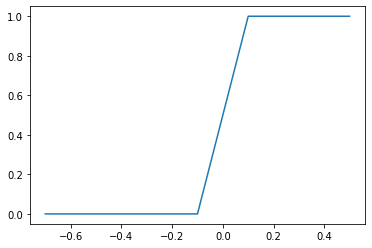

In [60]:
y = [uniform_pdf(key) for key in x]
plt.plot(x,y)
plt.show()

#### 균등분포에 대한 누적 분포 함수

In [46]:
def uniform_cdf(x:float)->float:
    """균등 분포를 따르는 확률변수의 값이 x보다 작거나 같은 확률로 반환"""
    if x<0:
        return 0
    elif x<1:
        return x
    else:
        return 1

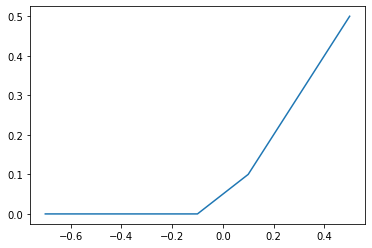

In [59]:
y = [uniform_cdf(item) for item in x]
plt.plot(x,y)
plt.show()

## 6.6 정규분포

In [62]:
import math
SQRT_TWO_PI = math.sqrt(2*math.pi)

def normal_pdf(x:float, mu:float=0, sigma:float=1)->float:
    return (math.exp(-(x-mu)**2/2/sigma**2)/(SQRT_TWO_PI*sigma))

#### 정규분포의 여러 밀도 함수

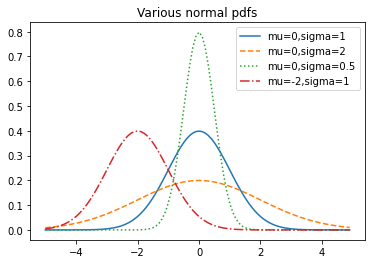

In [64]:
xs = [x/10.0 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x,sigma=1)for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2)for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5)for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-2) for x in xs],'-.',label='mu=-2,sigma=1')
plt.legend()
plt.title("Various normal pdfs")
plt.show()

#### 누적 분포 함수

In [67]:
def normal_cdf(x:float, mu:float=0, sigma:float=1)->float:
    return (1+math.erf((x-mu)/math.sqrt(2)/sigma))/2

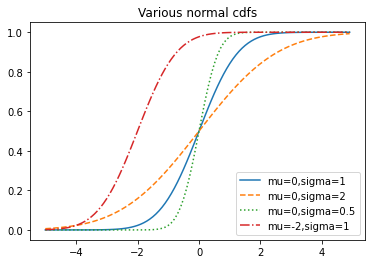

In [68]:
xs = [x/10.0 for x in range(-50,50)]
plt.plot(xs,[normal_cdf(x,sigma=1)for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2)for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5)for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-2) for x in xs],'-.',label='mu=-2,sigma=1')
plt.legend(loc=4)#bottom right
plt.title("Various normal cdfs")
plt.show()

#### 누적분포함수의 역함수

In [69]:
def inverse_normal_cdf(p:float, mu:float=0, sigma:float=1, tolerance:float=0.00001)->float:
    """이진 검색을 사용해서 역함수를 근사"""
    if mu!=0 or sigma != 1:
        return mu+sigma*inverse_normal_cdf(p,tolerance=tolerance)
    
    low_z = -10.0#normal_cdf(-10)은 0에 근접
    hi_z = 10.0#normal_cdf(10)은 1에 근접
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z)/2#중간값
        mid_p =  normal_cdf(mid_z)#중간값의 누적 분포 값을 계산
        if mid_p < p:
            low_z = mid_z#중간 값이 너무 작다면 더 큰 값들을 검색
        else:#중간 값이 너무 크다면 더 작은 값들을 검색
            hi_z=mid_z
    return mid_z

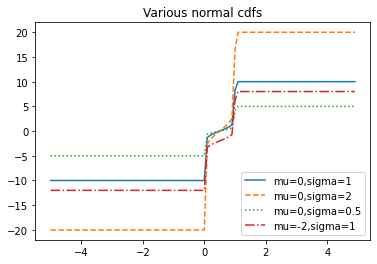

In [70]:
xs = [x/10.0 for x in range(-50,50)]
plt.plot(xs,[inverse_normal_cdf(x,sigma=1)for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[inverse_normal_cdf(x,sigma=2)for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[inverse_normal_cdf(x,sigma=0.5)for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[inverse_normal_cdf(x,mu=-2) for x in xs],'-.',label='mu=-2,sigma=1')
plt.legend(loc=4)#bottom right
plt.title("Various normal cdfs")
plt.show()

## 6.7 중심 극한 정리

In [71]:
#베르누이 확률 변수
def bernoulli_trial(p:float)->int:
    """p의 확률로 1을, 1-p의 확률로 0을 반환"""
    return 1 if random.random<p else 0

In [72]:
#이항 확률 변수
def binomial(n:int, p:float)->int:
    """n개 bernoulli(p)의 합을 반환"""
    return sum(bernoulli_trial(p) for _ in range(n))

In [74]:
from collections import Counter

def binomial_histogram(p:float, n:int, num_points:int)->None:
    """binomial(n,p)의 결괏값을 히스토그램으로 표현"""
    data = [binomial(n,p) for _ in range(num_points)]
    
    #이항분포의 표본을 막대그래프로 표현
    histogram = Counter(data)
    plt.bar([x-0.4 for x in histogram.keys()],
           [v/num_points for v in histogram.values()],
           0.8,
           color = '0.75')
    
    mu = p*n
    sigma = math.sqrt([n*p*(1-p)])
    
    #근사된 정규분포를 라인차트로 표현
    xs = range(min(data),max(data)+1)
    ys = [normal_cdf(i+0.5,mu,sigma)-normal_cdf(i-0.5, mu,sigma) for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial distribution vs. Normal Approximation")
    plt.show()

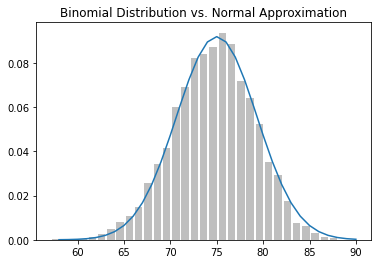

In [78]:
from matplotlib import pyplot as plt

def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    
    # 이항분포의 표본을 막대 그래프로 표현
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
           [v / num_points for v in histogram.values()],
           0.8,
           color = '0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    # 근사된 정규분포를 라인 차트로 표현
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
         for i in xs]
    plt.plot(xs, ys)
    plt.title('Binomial Distribution vs. Normal Approximation')
    plt.show()
    
make_hist(0.75, 100, 10000)